In [1]:
import numpy as np

#plots
from matplotlib import pyplot as plt
from getdist import plots, MCSamples
from scipy import stats

#astrophysics
#import galsim
import xlensing
from astropy.cosmology import FlatLambdaCDM

#saving
from astropy.table import Table
import pickle

#MCMC
import emcee

#utilities
#import os
import time
import warnings
warnings.filterwarnings('ignore')

Lookup table loaded!


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
mratio = np.load("mratio.npy",allow_pickle=True)
cratio = np.load("cratio.npy",allow_pickle=True)

mratio_low = np.load("mratio_lower_snr.npy",allow_pickle=True)
cratio_low = np.load("cratio_lower_snr.npy",allow_pickle=True)

In [4]:
mratio_low1 = np.load("../scripts/old_results/mratio_lower_snr1.npy",allow_pickle=True)

In [5]:
cratio_low1 = np.load("../scripts/old_results/cratio_lower_snr1.npy",allow_pickle=True)

In [6]:
mratio1 =  np.load("../scripts/old_results/mratio_higher_snr1627895121.1424127.npy",allow_pickle=True)

In [7]:
cratio1 =  np.load("../scripts/old_results/cratio_higher_snr1627895121.1424127.npy",allow_pickle=True)

In [8]:
mrationew = np.hstack([mratio,mratio1])

In [9]:
np.median(mrationew)

0.9450496954015211

In [10]:
crationew = np.hstack([cratio,cratio1])

In [11]:
np.median(crationew)

1.0267822176886405

In [12]:
mratio_low=np.hstack([mratio_low,mratio_low1])

In [13]:
cratio_low=np.hstack([cratio_low,cratio_low1])

In [14]:
mratiorange = np.load("../scripts/mratio_mass_range_higher_snr1628071582.9971664.npy",allow_pickle=True)
cratiorange = np.load("../scripts/cratio_mass_range_higher_snr1628071582.9971664.npy",allow_pickle=True)

In [18]:
mratiorangelow = np.load("../scripts/mratio_mass_range_lower_snr1628251455.9189878.npy",allow_pickle=True)
cratiorangelow = np.load("../scripts/cratio_mass_range_lower_snr1628251455.9189878.npy",allow_pickle=True)

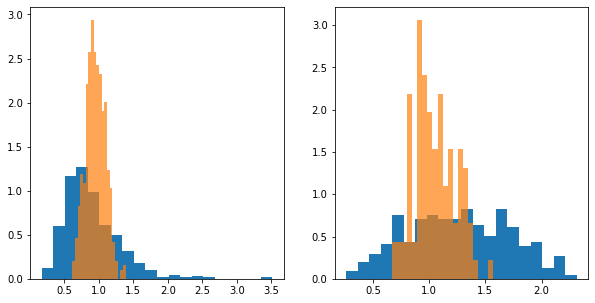

In [15]:
figure(figsize=(10,5))
subplot(121)
hist(mratio_low,density=True,bins=20);
hist(mrationew,alpha=0.7,density=True,bins=20);
subplot(122)
hist(cratio_low,density=True,bins=20);
hist(cratio,alpha=0.7,density=True,bins=20);

In [16]:
np.median(mrationew)

0.9450496954015211

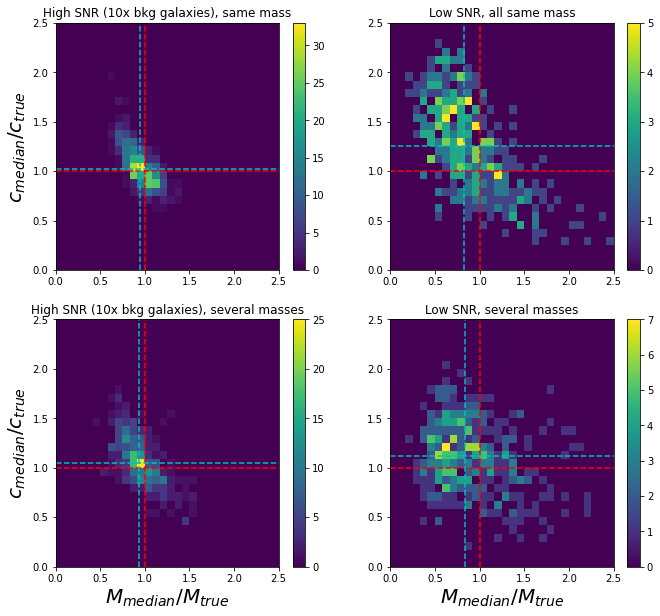

In [28]:
figure(figsize=(11,10))
subplot(221)
plt.hist2d(mrationew,crationew,range=np.array([(0, 2.5), (0, 2.5)]),bins=30); colorbar()
plt.plot([0,2.5],[1,1],'r--')
plt.plot([1,1],[0,2.5],'r--')
plt.plot([0.,2.5],[np.median(crationew),np.median(crationew)],'c--')
plt.plot([np.median(mrationew),np.median(mrationew)],[0.,2.5],'c--')
plt.title("High SNR (10x bkg galaxies), same mass")
plt.ylabel("$c_{median}/c_{true}$",fontsize=20)

subplot(222)
plt.hist2d(mratio_low,cratio_low,range=np.array([(0, 2.5), (0, 2.5)]),bins=30); colorbar()
plt.plot([0,2.5],[1,1],'r--')
plt.plot([1,1],[0,2.5],'r--')
plt.plot([0.,2.5],[np.median(cratio_low),np.median(cratio_low)],'c--')
plt.plot([np.median(mratio_low),np.median(mratio_low)],[0.,2.5],'c--')
plt.title("Low SNR, all same mass")


subplot(223)
plt.hist2d(mratiorange,cratiorange,range=np.array([(0, 2.5), (0, 2.5)]),bins=30); colorbar()
plt.plot([0.,2.5],[1,1],'r--')
plt.plot([1,1],[0.,2.5],'r--')
plt.plot([0.,2.5],[np.median(cratiorange),np.median(cratiorange)],'c--')
plt.plot([np.median(mratiorange),np.median(mratiorange)],[0.,2.5],'c--')
plt.title("High SNR (10x bkg galaxies), several masses")
plt.xlabel("$M_{median}/M_{true}$",fontsize=20)
plt.ylabel("$c_{median}/c_{true}$",fontsize=20)

subplot(224)
plt.hist2d(mratiorangelow,cratiorangelow,range=np.array([(0, 2.5), (0, 2.5)]),bins=30); colorbar()
plt.plot([0.,2.5],[1,1],'r--')
plt.plot([1,1],[0.,2.5],'r--')
plt.plot([0.,2.5],[np.median(cratiorangelow),np.median(cratiorangelow)],'c--')
plt.plot([np.median(mratiorangelow),np.median(mratiorangelow)],[0.,2.5],'c--')
plt.title("Low SNR, several masses")
plt.xlabel("$M_{median}/M_{true}$",fontsize=20)


plt.savefig('simulated_clusters_test.png',bbox_inches='tight')